In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np, crocoddyl, random; crocoddyl.switchToNumpyArray()
import pandas as pd

data = []

for _ in range(100000):
    initial_config = [random.uniform(-1.99, 1.99), random.uniform(-1.99, 1.99), 0]            
    model = crocoddyl.ActionModelUnicycle()

    model.costWeights = np.matrix([1, 0.3]).T

    problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 20, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 1000)
    position = []
    # Attach x, y, theta
    position.extend(i for i in ddp.xs[0])
    # Attach linear_velocity, angular_velocty
    position.extend(i for i in ddp.us[0])
    # Attach cost
    position.append(sum(d.cost for d in ddp.datas()))
    # Attach the number of iterations
    position.append(ddp.iter)
    data.append(position)
    
data = np.array(data)
df = pd.DataFrame(data[0:,0:], columns = ["x_position", "y_position", "z_position", "linear_velocity", "angular_velocity", "value_function", "iterations"])
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("whitegrid")
mpl.rcParams['figure.dpi'] = 80

fig = plt.figure(figsize=(12, 10))
plt.axis(aspect='image')

plt.scatter(data[:, 0], data[:, 1], c=data[:, 4], cmap = 'jet', alpha = 0.8, linewidths = 0)
plt.xlabel("X Coordinates", fontsize = 20)
plt.ylabel("Y Coordinates", fontsize = 20)
cb = plt.colorbar()
#cb.set_label("Value Function", fontsize = 20)
plt.title("Angular velocity", fontsize = 20)
plt.show()


In [ ]:
import numpy as np, crocoddyl, random; crocoddyl.switchToNumpyArray()
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import random
sns.set_style("whitegrid")
mpl.rcParams['figure.dpi'] = 80
trajectories = []
cost = []
    
def point(h, k, r):
    theta = random() * 2 * pi
    return h + cos(theta) * r, k + sin(theta) * r

for _ in range(50):
    x, y = point(0, 0, 2.1)
    
    initial_config = [x, y, 0]            
    model = crocoddyl.ActionModelUnicycle()
    model.costWeights = np.matrix([1, 0.3]).T
    problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 30, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 1000)

    
    trajectory = np.array(ddp.xs)
    trajectory  = trajectory[:,0:2]
    cost.append(sum(d.cost for d in ddp.datas()))
    trajectories.append(trajectory)
       
c = np.around(cost)

norm = mpl.colors.Normalize(vmin=min(c), vmax=max(c))
cmap = mpl.cm.ScalarMappable(norm = norm, cmap=mpl.cm.YlOrBr)
cmap.set_array([])
    
    
fig = plt.figure(figsize=(12, 10))
    
for i, trajectory in enumerate(trajectories):
    plt.scatter(trajectory[:, 0], trajectory[:, 1], marker = '', zorder=2, s=50,linewidths=0.2,alpha=.8, cmap = cmap )
    plt.plot(trajectory[:, 0], trajectory[:, 1], c=cmap.to_rgba(i + 1))
plt.xlabel("X Coordinates", fontsize = 20)
plt.ylabel("Y Coordinates", fontsize = 20)
plt.title("Trajectories from Crocoddyl (Not Learned)", fontsize =20)
plt.colorbar(cmap)

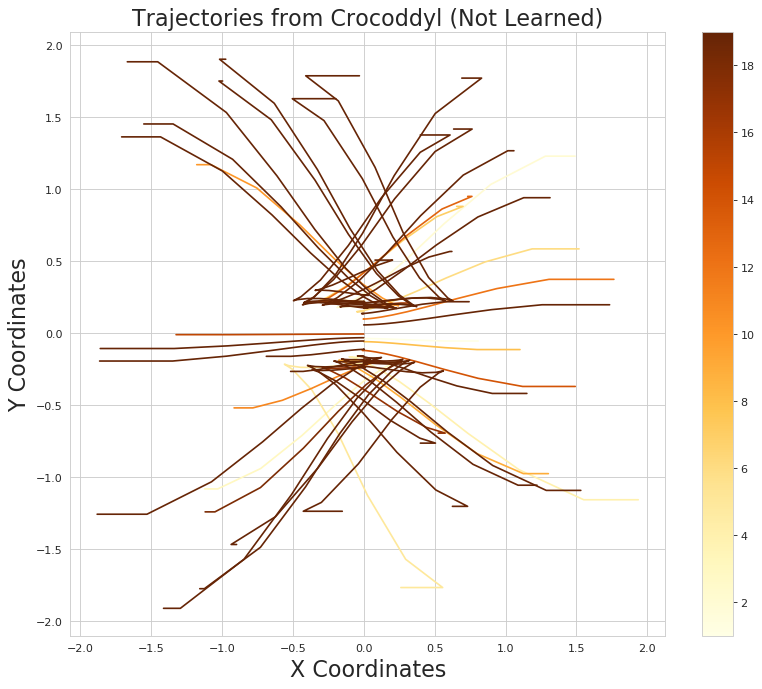

In [2]:
import numpy as np, crocoddyl; crocoddyl.switchToNumpyArray()
import random as random
import pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from random import random
sns.set_style("whitegrid")
mpl.rcParams['figure.dpi'] = 80
trajectories = []
cost = []
    


for _ in range(50):
    
    initial_config = [np.random.uniform(-1.99, 1.99), np.random.uniform(-1.99, 1.99), 0]            
    model = crocoddyl.ActionModelUnicycle()
    model.costWeights = np.matrix([1, 0.3]).T
    problem = crocoddyl.ShootingProblem(np.matrix(initial_config).T, [ model ] * 30, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 1000)

    
    trajectory = np.array(ddp.xs)
    trajectory  = trajectory[:,0:2]
    cost.append(sum(d.cost for d in ddp.datas()))
    trajectories.append(trajectory)
       
c = np.around(cost)

norm = mpl.colors.Normalize(vmin=min(c), vmax=max(c))
cmap = mpl.cm.ScalarMappable(norm = norm, cmap=mpl.cm.YlOrBr)
cmap.set_array([])
    
    
fig = plt.figure(figsize=(12, 10))
    
for i, trajectory in enumerate(trajectories):
    plt.scatter(trajectory[:, 0], trajectory[:, 1], marker = '', zorder=2, s=50,linewidths=0.2,alpha=.8, cmap = cmap )
    plt.plot(trajectory[:, 0], trajectory[:, 1], c=cmap.to_rgba(i + 1))
plt.xlabel("X Coordinates", fontsize = 20)
plt.ylabel("Y Coordinates", fontsize = 20)
plt.title("Trajectories from Crocoddyl (Not Learned)", fontsize =20)
plt.colorbar(cmap)